In [66]:
# Importing Standard Libraries
import pandas as pd
import numpy as np
from csv import reader

# Sklearn Libraries
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.naive_bayes import *
from sklearn.cluster import KMeans, DBSCAN
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Importing mlxtend Libraries
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Graphing Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Importing the Data Set
df =  pd.read_csv("bank.csv")
# df =  pd.read_csv("bank-full.csv")
df.head()

# Establishing copies for running through the different scrubs
df_a = df.copy()
df_b = df.copy()


# Part 2
Changing all non-numeric into category data for PCA

In [68]:
df_b['job'] = df_b['job'].astype('category')
df_b['job'] = df_b['job'].cat.codes
df_b['marital'] = df_b['marital'].astype('category')
df_b['marital'] = df_b['marital'].cat.codes
df_b['education'] = df_b['education'].astype('category')
df_b['education'] = df_b['education'].cat.codes
df_b['default'] = df_b['default'].astype('category')
df_b['default'] = df_b['default'].cat.codes
df_b['contact'] = df_b['contact'].astype('category')
df_b['contact'] = df_b['contact'].cat.codes
df_b['month'] = df_b['month'].astype('category')
df_b['month'] = df_b['month'].cat.codes
df_b['poutcome'] = df_b['poutcome'].astype('category')
df_b['poutcome'] = df_b['poutcome'].cat.codes
df_b['housing'] = df_b['housing'].astype('category')
df_b['housing'] = df_b['housing'].cat.codes
df_b['loan'] = df_b['loan'].astype('category')
df_b['loan'] = df_b['loan'].cat.codes
df_b['y'] = df_b['y'].astype('category')
df_b['y'] = df_b['y'].cat.codes
df_b = df_b.drop('pdays',axis=1)
# df_b['balance'] = (df_b['balance'] - df_b['balance'].min()) / ( df_b['balance'].max() - df_b['balance'].min())
print("Post Conversion of Data into numeric, dropping pdays, and normalizing balance:")
df_b.head(10)

Post Conversion of Data into numeric, dropping pdays, and normalizing balance:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,0,3,0
5,35,4,2,2,0,747,0,0,0,23,3,141,2,3,0,0
6,36,6,1,2,0,307,1,0,0,14,8,341,1,2,1,0
7,39,9,1,1,0,147,1,0,0,6,8,151,2,0,3,0
8,41,2,1,2,0,221,1,0,2,14,8,57,2,0,3,0
9,43,7,1,0,0,-88,1,1,0,17,0,313,1,2,0,0


Quick Data Visualization

In [69]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int8 
 2   marital    4521 non-null   int8 
 3   education  4521 non-null   int8 
 4   default    4521 non-null   int8 
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int8 
 7   loan       4521 non-null   int8 
 8   contact    4521 non-null   int8 
 9   day        4521 non-null   int64
 10  month      4521 non-null   int8 
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  previous   4521 non-null   int64
 14  poutcome   4521 non-null   int8 
 15  y          4521 non-null   int8 
dtypes: int64(6), int8(10)
memory usage: 256.2 KB


<AxesSubplot:>

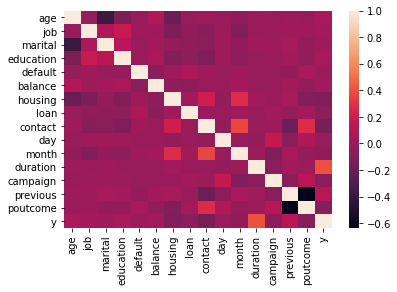

In [70]:
sns.heatmap(df_b.corr())

From the Correlation Map we can see that Y has a high correlation with marital status followed by education and housing.

Preprocessing the Data for PCA

In [71]:
y = df_b["y"]
X = df_b.drop("y", axis=1)

# Splitting the dataset into Train Set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

PCA Performs best with normalized Feature sets. Next we perform standard scalar normalization to normalize our feature set

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Now to Apply PCA

In [73]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Creating the explained variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.12337809, 0.11049389, 0.09820779, 0.07909384, 0.07684711,
       0.06813931, 0.06360677, 0.06279201, 0.06137877, 0.05671919,
       0.05495647, 0.05007064, 0.03565706, 0.03484009, 0.023819  ])

In [75]:
sum(explained_variance)

1.0000000000000002

Now Looking at Plots for the optimal amount of clusters

[[1, 0.8298342541436464],
 [2, 0.8298342541436464],
 [3, 0.825414364640884],
 [4, 0.8298342541436464],
 [5, 0.825414364640884],
 [6, 0.8287292817679558],
 [7, 0.825414364640884],
 [8, 0.8187845303867404],
 [9, 0.8331491712707182],
 [10, 0.8287292817679558],
 [11, 0.8276243093922652],
 [12, 0.8232044198895028],
 [13, 0.8265193370165745],
 [14, 0.8364640883977901],
 [15, 0.8342541436464088]]